In [1]:
import busio
import adafruit_mlx90640
import board

I2C = busio.I2C(board.SCL, board.SDA, frequency=400000)
MLX = adafruit_mlx90640.MLX90640(I2C)
MLX.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_4_HZ

/home/bloom/cognanathema-raspi/venv/lib/python3.11/site-packages/adafruit_blinka/microcontroller/generic_linux/i2c.py:30: RuntimeWarning: I2C frequency is not settable in python, ignoring!
  warnings.warn(


In [53]:
import numpy as np

thermal_buffer = np.zeros(24 * 32, dtype=int)
MLX.getFrame(thermal_buffer)
frame = thermal_buffer.reshape((24, 32))

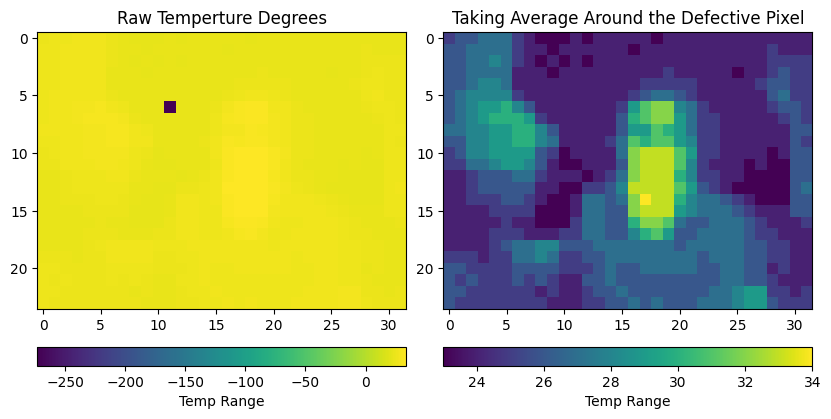

In [54]:
from typing import List
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
cax1 = axes[0].imshow(np.fliplr(frame))
axes[0].set_title("Raw Temperture Degrees")

DEAD_PIXEL = np.unravel_index(212, (24, 32))
KERNEL = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=bool)
a = np.mean(
    frame[
        DEAD_PIXEL[0] - 1 : DEAD_PIXEL[0] + 2,
        DEAD_PIXEL[1] - 1 : DEAD_PIXEL[1] + 2,
    ],  # type: ignore
    where=KERNEL,
)
_frame = frame.copy()
_frame[DEAD_PIXEL] = a

cax2 = axes[1].imshow(np.fliplr(_frame))
axes[1].set_title("Taking Average Around the Defective Pixel")
cbar = fig.colorbar(cax1, orientation="horizontal", pad=0.1)
cbar.set_label("Temp Range", size=10)
cbar = fig.colorbar(cax2, orientation="horizontal", pad=0.1)
cbar.set_label("Temp Range", size=10)

plt.subplots_adjust(wspace=0.1)
fig.savefig("plot1.png", dpi="figure")

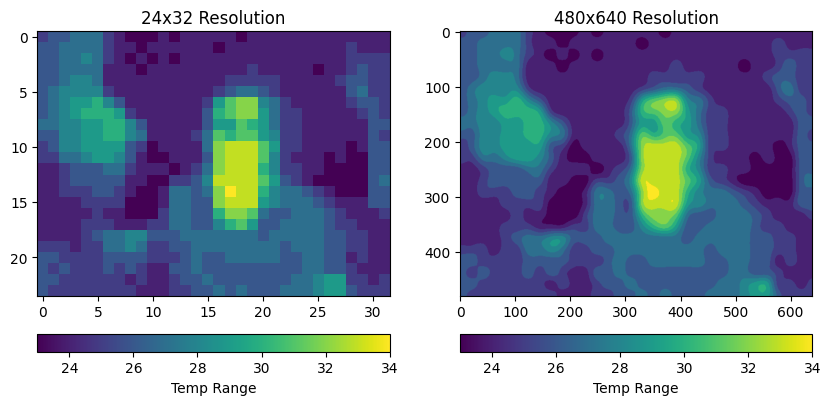

In [56]:
from scipy import ndimage

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].set_title("24x32 Resolution")
cax1 = axes[0].imshow(np.fliplr(_frame))
frame_upscaled = ndimage.zoom(_frame, 20)
cax2 = axes[1].imshow(np.fliplr(frame_upscaled))
axes[1].set_title("480x640 Resolution")
cbar = fig.colorbar(cax1, orientation="horizontal", pad=0.1)
cbar.set_label("Temp Range", size=10)
cbar = fig.colorbar(cax2, orientation="horizontal", pad=0.1)
cbar.set_label("Temp Range", size=10)

plt.subplots_adjust(wspace=0.2)
fig.savefig("plot2.png", dpi="figure")